In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn import preprocessing, model_selection
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
com = pd.read_csv('companies.csv')
com.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
com['founded_at'].value_counts()

2011-01-01    3748
2010-01-01    3718
2012-01-01    3362
2009-01-01    3324
2008-01-01    2818
              ... 
1996-08-06       1
1971-06-06       1
1991-12-20       1
1982-04-17       1
1988-08-15       1
Name: founded_at, Length: 6156, dtype: int64

## EDA:

In [4]:
com.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


Short description of our dataset, this will give us the short summary of dataset it gives the 
- counts 
- mean 
- standard deviation
- minimum
- 1st quantile
- 2nd quantile
- 3rd quantile 
- maximum value of each columns.

In [5]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

Information about the dataset.
- RangeIndex : 0 - 196552
- columns : 44
- dtypes : float(12), int(2), object(30)

In [6]:
com.isna().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

There are so many null values present in our dataset, there are only 9 columns with 0 null values and some of the columns are of completely null values or empty columns, also some of the columns only have few entries.
So, going to drop all those unnecessary columns with all the null values and will not required in further analysis.

## Data Cleaning.

In [7]:
data = com.drop(columns = ['id','entity_type','permalink','region','created_by','Unnamed: 0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview','short_description','twitter_username','short_description','description','tag_list','state_code','city','first_investment_at', 'last_investment_at','first_milestone_at','last_milestone_at',  'first_funding_at','last_funding_at','lat','lng'])
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI
0,1,Wetpaint,web,operating,2005-10-17,NaN,USA,NaN,NaN,3.0,39750000.0,5.0,17.0,2007-05-25 06:51:27,2013-04-13 03:29:00,15.5
1,10,Flektor,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,6.0,2007-05-31 21:11:51,2008-05-23 23:23:14,NaN
2,100,There,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,4.0,12.0,2007-08-06 23:52:45,2013-11-04 02:09:48,NaN
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN


**- Droping the unwanted columns:**

'id','Unnamed:0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview',
'short_description','twitter_username','description','tag_list','country_code','state_code','city','first_investment_at','last_investment_at','first_milestone_at',
'last_milestone_at','first_funding_at','last_funding_at','lat','lng'
- Dropping all these columns because
 - Some columns are empty.
 - Unwanted object columns.
 - 70% of Null values present in the columns.
 - Empty columns.
 - Unnecessary columns.

## Dropping Null rows:

In [8]:
data.dropna(subset= ['name','country_code','category_code','founded_at'],inplace = True)
data.shape

(64094, 16)

## Filling the missing values

**- Filling the Investment Rounds columns with the median() method, as rounds cannot be in float datatype**

In [9]:
data['investment_rounds'] = data['investment_rounds'].fillna(data['investment_rounds'].median())

**- Filling the Invested Companies columns with the median() method, as in our dataset the Invested Companies data is in integer so it cannot be in float datatype**

In [10]:
data['invested_companies'] = data['invested_companies'].fillna(data['invested_companies'].median())

**- Filling the Funding Rounds columns with the median() method, as in our dataset the Funding Rounds data is in integer so it cannot be in float datatype.**

In [11]:
data['funding_rounds'] = data['funding_rounds'].fillna(data['funding_rounds'].median())

**- Filling the Funding Total USD columns with the mean() method, as in Funding Total USD is an int type and can be float data.**

In [12]:
data['funding_total_usd'] = data['funding_total_usd'].fillna(data['funding_total_usd'].mean())

**- Filling the Milestones columns with the mode() method.**

In [13]:
data['milestones'] = data['milestones'].fillna(data['milestones'].mode()[0])

**- Filling the Relationships columns with the mean() method.**

In [14]:
data['relationships'] = data['relationships'].fillna(data['relationships'].mean())

**- Filling the ROI columns with the mean() method.**

In [15]:
data['ROI'] = data['ROI'].fillna(data['ROI'].mean())

## Datetime columns :

**- Converting the dtype to datetime.**

In [16]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_at'] = data['founded_at'].dt.year

**- Filling the null values with mode()**

In [17]:
data['founded_at'] = data['founded_at'].fillna(data['founded_at'].mode()[0])

**- Converting the dtype to datetime.**

In [18]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['closed_at'] = data['closed_at'].dt.year

**- Filling the closed_at column with some condition.**
- If Status is operating or ipo, fillna with 2021
- If Status is accquired or closed, fillna with mode()

In [19]:
for i in data['status']:
    if (i == 'operating' or 'ipo'):
        data['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        data['closed_at'].fillna(2012, inplace = True)

## Updateing the Date columns and taking only the year from it.

In [20]:
created = []
for i in data['created_at']:
    created.append(i.split('-')[0])
data['created_at']= created

In [21]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['created_at'] = data['created_at'].dt.year

In [22]:
created = []
for i in data['updated_at']:
    created.append(int(i.split('-')[0]))
data['updated_at']= created

## Adding new updated columns :

**-Adding Companies Age(in years), by subtracting founded at from closed at columns.**

In [23]:
data['companies_age'] = data['closed_at'] - data['founded_at']

**- After substraction, some of the entries will be negative value, so will remove negative value.**

In [24]:
index = np.where(data['companies_age'] < 0)
data['companies_age'] = data['companies_age'].drop(data['companies_age'].index[index])

In [25]:
data['companies_age'] = data['companies_age'].fillna(0)

In [26]:
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,Wetpaint,web,operating,2005,2021.0,USA,1.0,1.0,3.0,3.975000e+07,5.0,17.00000,2007,2013,15.50000,16.0
5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0


In [27]:
data['companies_age'].max()

120.0

In [28]:
data.isna().sum()

entity_id             0
name                  0
category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
investment_rounds     0
invested_companies    0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_at            0
updated_at            0
ROI                   0
companies_age         0
dtype: int64

There are no null values present in our cleaned dataset.

In [29]:
data.reset_index(inplace = True)

As dropping null values from dataset, the indexes are distrubted so using reset_index() to reset the index.

Final dataset shape is (64094, 18)

## Correlation :

Correlation between the columns in our dataset using heatmap.
- Investment Round and Invested Companies columns are highly correlated columns, and we can drop any of the column further.
- Founted at and Companies age columns are also highly correlated columns.

## Normal Distribution :

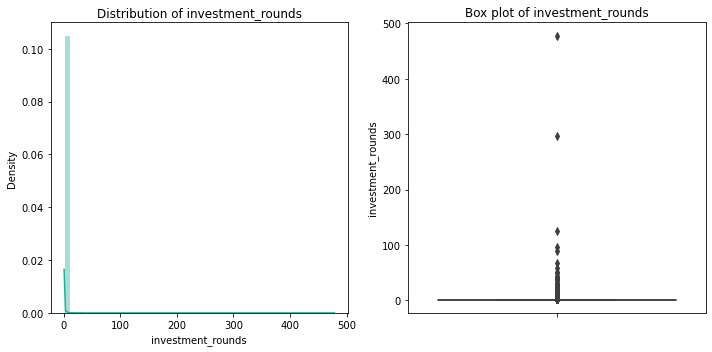

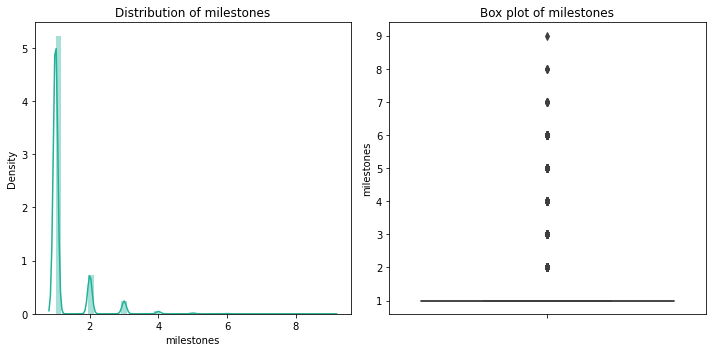

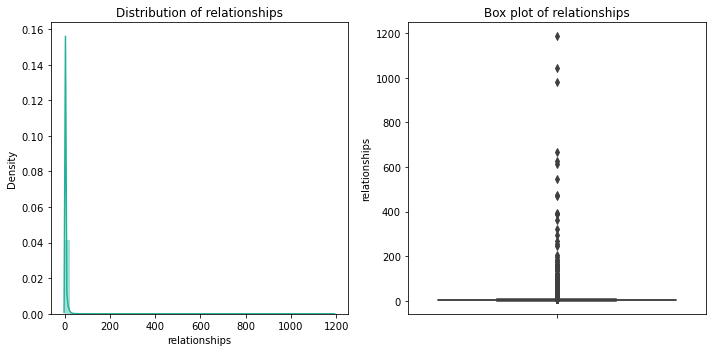

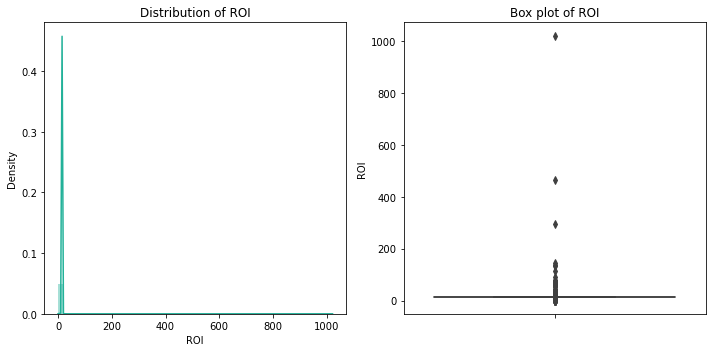

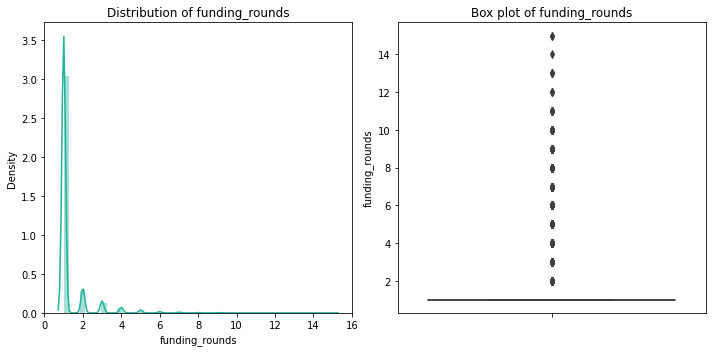

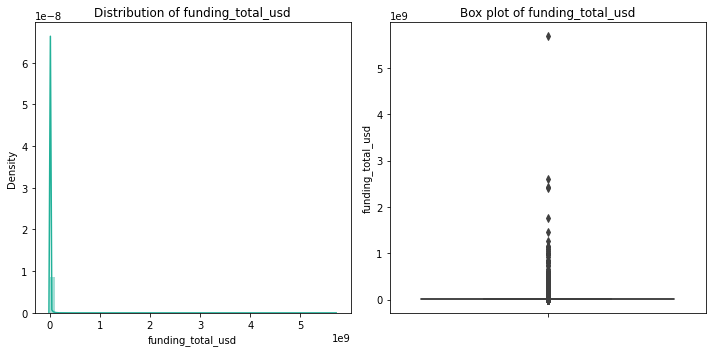

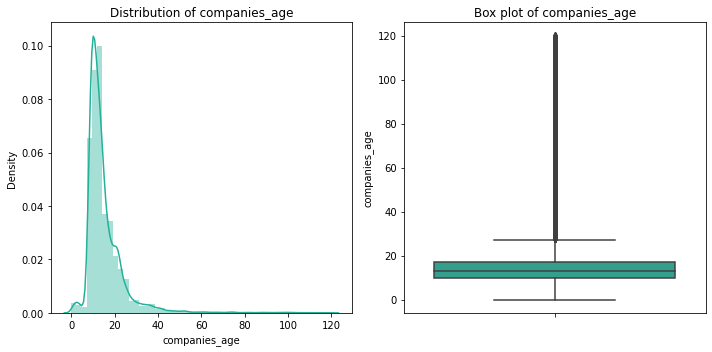

(64094, 18)


In [30]:
def check_outliers(x):
    global data
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age']:
    check_outliers(i)
    
print(data.shape)

- Dataset is not normally distributed.
- Dataset is very much skewed.
- Dataset will also have many outliers.

## Before Removing Outliers:

In [31]:
data[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,6.409400e+04,64094.000000
mean,1.581978e+07,1.287749
std,3.950322e+07,0.873294
min,2.910000e+02,1.000000
25%,1.500000e+07,1.000000
50%,1.581978e+07,1.000000
75%,1.581978e+07,1.000000
max,5.700000e+09,15.000000


In [32]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [33]:
high = (q3.funding_total_usd + (1.5 * iqr.funding_total_usd))
print(high)

index = np.where(data['funding_total_usd'] > high)
print(index)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

17049455.46631492
(array([    0,     7,    10, ..., 64031, 64065, 64078], dtype=int64),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,14.41045,14.0
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,14.41045,14.0
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,14.41045,62.0
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,14.41045,13.0


In [34]:
high_fu = (q3.funding_rounds + (1.5 * iqr.funding_rounds))
print(high_fu)

index_fu = np.where(data['funding_rounds'] > high)
print(index_fu)

data = data.drop(data.index[index_fu])
print(data.shape)

data.reset_index()

1.0
(array([], dtype=int64),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,14.41045,14.0
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,14.41045,14.0
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,14.41045,62.0
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,14.41045,13.0


## After Removing Outliers:

<AxesSubplot:xlabel='funding_total_usd'>

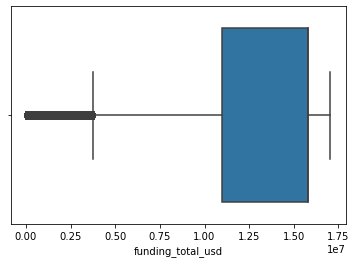

In [35]:
sns.boxplot(data['funding_total_usd'])

<AxesSubplot:xlabel='funding_rounds'>

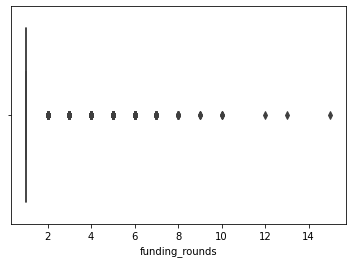

In [36]:
sns.boxplot(data['funding_rounds'])

In [37]:
'''def remove_outliers(x):
    global data
    Q1= data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(data[x] > upper_limit)
    data = data.drop(data.index[index])
    data.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age','invested_companies']:
    remove_outliers(i)
print(data.shape)'''

"def remove_outliers(x):\n    global data\n    Q1= data[x].quantile(0.25)\n    Q3 = data[x].quantile(0.75)\n    IQR = Q3 - Q1\n    upper_limit = Q3 + 1.5 * IQR\n    \n    index = np.where(data[x] > upper_limit)\n    data = data.drop(data.index[index])\n    data.reset_index()\n        \n    fig, axes = plt.subplots(1,2,figsize=(10,5))\n    sns.distplot(data[x],color='#22b199',ax=axes[0])\n    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])\n    axes[0].set_title('Distribution of '+ x )\n    axes[1].set_title('Box plot of '+ x)\n    plt.tight_layout()\n    plt.show()\n\nfor i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age','invested_companies']:\n    remove_outliers(i)\nprint(data.shape)"

In [38]:
'''Q1= data['funding_total_usd'].quantile(0.25)
Q3 = data['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
    
index = np.where(data['funding_total_usd'] < lower_limit)
data = data.drop(data.index[index])
data.reset_index()
        
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(data['funding_total_usd'],color='#22b199',ax=axes[0])
sns.boxplot(y=data['funding_total_usd'],color='#22b199',ax=axes[1])
axes[0].set_title('Distribution of funding_total_usd without outliers')
axes[1].set_title('Box plot of funding_total_usd')
plt.tight_layout()
plt.show()

print(data.shape)'''

"Q1= data['funding_total_usd'].quantile(0.25)\nQ3 = data['funding_total_usd'].quantile(0.75)\nIQR = Q3 - Q1\nlower_limit = Q1 - 1.5 * IQR\n    \nindex = np.where(data['funding_total_usd'] < lower_limit)\ndata = data.drop(data.index[index])\ndata.reset_index()\n        \nfig, axes = plt.subplots(1,2,figsize=(10,5))\nsns.distplot(data['funding_total_usd'],color='#22b199',ax=axes[0])\nsns.boxplot(y=data['funding_total_usd'],color='#22b199',ax=axes[1])\naxes[0].set_title('Distribution of funding_total_usd without outliers')\naxes[1].set_title('Box plot of funding_total_usd')\nplt.tight_layout()\nplt.show()\n\nprint(data.shape)"

We are not removing every outliers of our dataset because :
1. Removing all outliers will lead to data leakage.
2. 2695 rows × 29 columns, is the shape of our dataset, after removing the outliers.
3. Its also not giving the best accuracy for the model.
4. For RandomForest Model the accuracy is approx. 75%
5. For KNN Model the accuracy is approx. 70%

## Encoding :

**- Encoding the Category Code column by replace method.**

In [39]:
data['category_code'].value_counts()

software            10948
web                  7878
ecommerce            4885
other                4769
mobile               3716
advertising          3583
consulting           2804
games_video          2789
enterprise           2449
biotech              1911
public_relations     1545
hardware             1413
network_hosting      1240
education            1157
search                975
cleantech             755
social                655
analytics             648
finance               636
security              603
health                595
legal                 369
medical               337
travel                327
semiconductor         324
news                  280
manufacturing         269
fashion               264
hospitality           263
real_estate           221
photo_video           197
local                 196
messaging             186
music                 181
sports                166
transportation        126
nonprofit             115
design                108
automotive  

**- Encoding the Country code column,**

In [40]:
top = ['USA','GBR','IND','CAN','DEU','FRA','AUS','ESP','ISR','NLD']

In [41]:
data.loc[~data['country_code'].isin(top),'country_code'] = 'other'

In [42]:
data['country_code'].value_counts()

USA      33820
other     9663
GBR       5047
IND       3014
CAN       2625
DEU       1364
FRA       1216
AUS       1031
ESP        884
ISR        751
NLD        654
Name: country_code, dtype: int64

In [43]:
data['category_code'] = data['category_code'].replace(['public_relations','hardware','network_hosting','education','search','cleantech','analytics','finance','social','security','health','medical','semiconductor','legal','travel','news','manufacturing','fashion','hospitality','real_estate','photo_video','messaging','music','local','sports','transportation','nonprofit','automotive','design','nanotech','pets','government'],'other')

**- Get dummies method on dataset.**

In [44]:
data = pd.get_dummies(data, columns = ['category_code','country_code'])

In [45]:
data.drop(columns = ['name','invested_companies'],inplace = True)

## Imbalanced Target Column:

In [46]:
data.shape

(60069, 35)

In [47]:
data.status.value_counts()

operating    54823
acquired      3337
closed        1492
ipo            417
Name: status, dtype: int64

In [48]:
data['status'] = data['status'].replace('operating',1)
data['status'] = data['status'].replace('ipo',1)
data['status'] = data['status'].replace('closed',0)
data['status'] = data['status'].replace('acquired',0)

Our target column is not balanced and need to work on the imbalance column:

In [49]:
x = data.drop('status',axis = 1)
y = data.status

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

In [51]:
ds = NearMiss(0.75)
x_train_nm,y_train_nm = ds.fit_resample(x_train,y_train)

In [52]:
print('Before Fit: {}'.format(Counter(y_train)))
print('After Fit: {}'.format(Counter(y_train_nm)))

Before Fit: Counter({1: 41459, 0: 3592})
After Fit: Counter({1: 4789, 0: 3592})


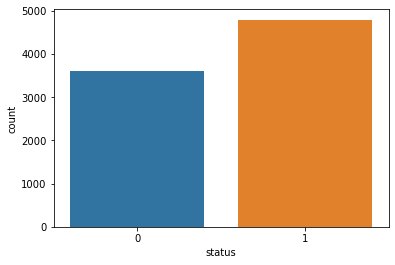

In [53]:
sns.countplot(y_train_nm)
plt.show()

**Now, our target column is balanced.**

In [54]:
y_train_nm = y

## PCA

In [55]:
X = x_train_nm.copy()
pca = PCA(n_components=2)
pca_X= pca.fit_transform(X)

In [56]:
loadings = pd.DataFrame(
   data = pca_X, columns = ['principal component 1', 'principal component 2']
)
loadings['y']=y_train_nm
loadings

,principal component 1,principal component 2,y
0,1.308493e+07,102929.360946,NaN
1,1.318493e+07,103225.214655,1.0
2,-2.284865e+06,95508.416748,1.0
3,2.494762e+06,-70549.675005,1.0
4,-2.284975e+06,-21873.729536,0.0
...,...,...,...
8376,-2.284991e+06,-30487.542819,0.0
8377,-2.284987e+06,-27757.041290,1.0
8378,-2.284977e+06,-18543.143483,1.0
8379,-2.284975e+06,-21759.369514,1.0


In [57]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99764800e-01, 1.46582547e-04])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

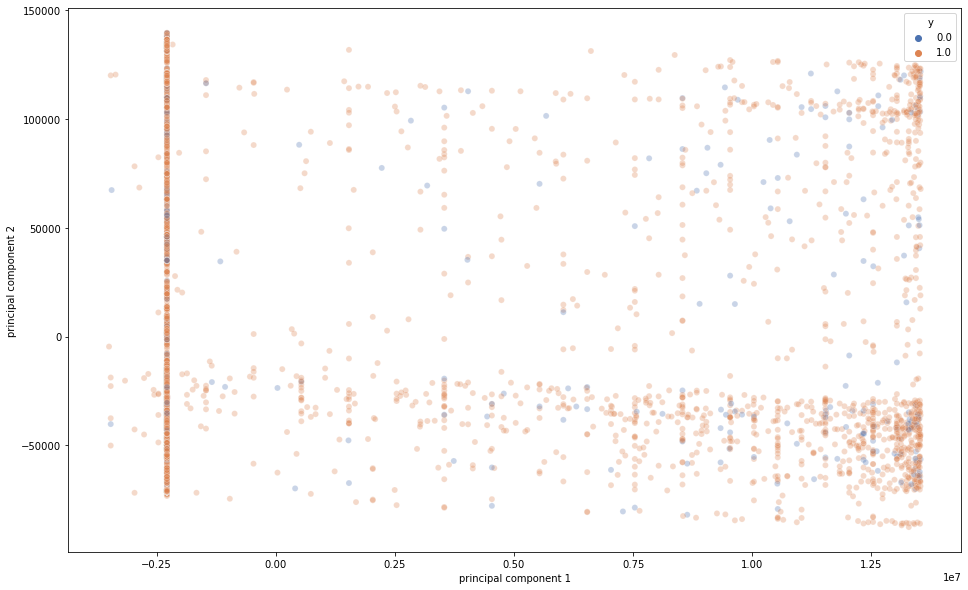

In [58]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    data=loadings,
    legend="full",
    alpha=0.3,
    palette="deep"
)

From the above graph, you can observe that there is no best_fit_line can divide the dataset into 2 classes

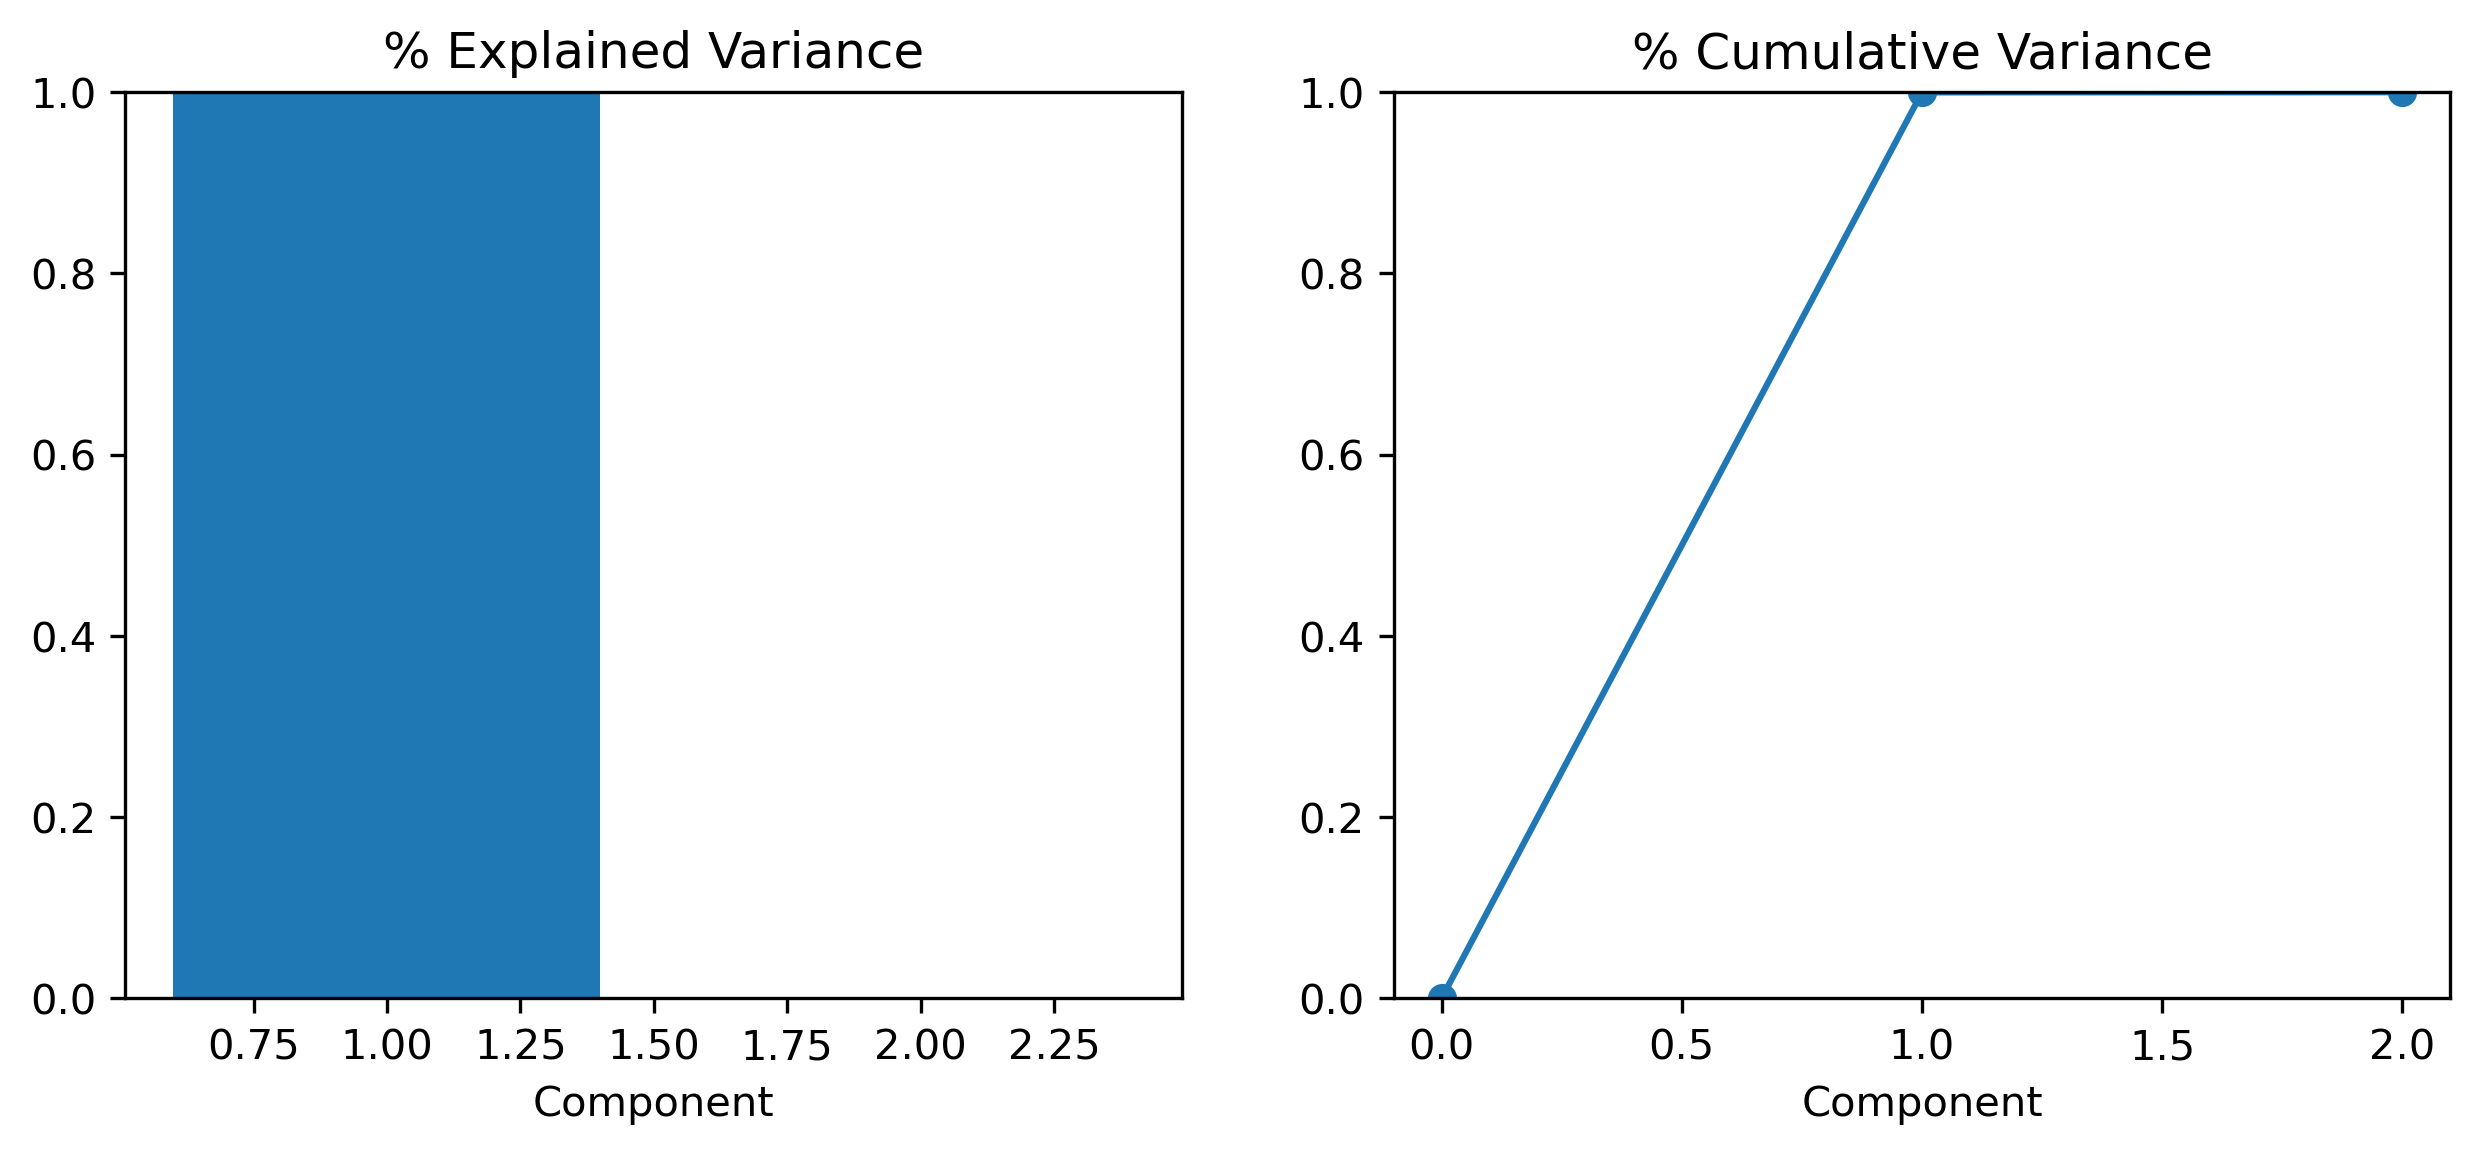

In [59]:
def plot_variance(pca, width=10, dpi=200):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
   
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
   
    fig.set(figwidth=10, dpi=300)
    return axs
plot_variance(pca);

## Final Dataset

In [60]:
data = data.drop(columns = ['index','entity_id'])

In [61]:
data

,status,founded_at,closed_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
1,1,2007,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,...,0,0,0,0,0,0,0,0,0,1
2,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,...,0,0,0,0,0,1,0,0,0,0
3,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,...,0,0,0,0,0,0,0,0,1,0
4,0,2007,2021.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,...,0,0,0,0,0,0,0,0,1,0
5,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64089,1,2007,2021.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,...,0,0,0,0,0,0,0,0,1,0
64090,1,2007,2021.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,...,0,0,0,0,0,0,0,0,1,0
64091,1,1959,2021.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,...,0,0,0,0,0,0,0,0,1,0
64092,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,...,0,0,0,0,0,0,0,0,1,0


In [62]:
data.duplicated().sum()

19108

This is the final dataset.


## Scaling the dataset.

**- Seperating the features and target column.**

In [63]:
x = data.drop('status',axis = 1)
y = y_train_nm

**- Using Standard Scaler to scale the features.**

In [64]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.1410165 ,  0.15702045, -0.01694127, ..., -0.10491578,
        -1.13509032,  2.2839423 ],
       [ 0.24366203,  0.15702045, -0.01694127, ..., -0.10491578,
        -1.13509032, -0.43783943],
       [ 0.24366203,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943],
       ...,
       [-4.78596903,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943],
       [ 0.24366203,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943],
       [ 0.1410165 ,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943]])

### Functions for Testing the accuracy

In [65]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

In [66]:
def roc_curve_plot(clas, x_test, y_test):
    print('Roc Curve')
    plot_roc_curve(clas, x_test, y_test) 
    
def confusion_matrix_plot(clas, x_test, y_test):
    pred = clas.predict(x_test)
    print('Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test.values.ravel(),pred), annot=True,fmt="d")
    plt.rcParams["figure.figsize"]=(5,5)
    plt.show()

In [67]:
def sample(clas,x_test,x_train):
    y_test_pred = clas.predict(x_test)
    y_train_pred = clas.predict(x_train)
    print('the first 20 samples from dataset: ')
    print(y_train_pred[0:20])
    print(y_test_pred[0:20])

## Random Forest

### Model Training

In [68]:
rfc = RandomForestClassifier()

In [69]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = i, test_size = 0.25)
    rfc.fit(x_train,y_train)
    pred_train = rfc.predict(x_train)
    pred_test = rfc.predict(x_test) 
    if  round(accuracy_score(y_test,pred_test)*100,1) >= 93:
        print('At Random state:',i)
        print('Training score :',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing score:',round(accuracy_score(y_test,pred_test)*100,1))

At Random state: 0
Training score : 99.0
Testing score: 94.2
At Random state: 1
Training score : 99.0
Testing score: 94.5
At Random state: 2
Training score : 99.0
Testing score: 94.4
At Random state: 3
Training score : 99.0
Testing score: 94.6
At Random state: 4
Training score : 99.0
Testing score: 94.4
At Random state: 5
Training score : 99.0
Testing score: 94.2
At Random state: 6
Training score : 99.1
Testing score: 94.3
At Random state: 7
Training score : 99.0
Testing score: 94.4
At Random state: 8
Training score : 99.0
Testing score: 94.6
At Random state: 9
Training score : 99.0
Testing score: 94.6


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 8)

### Model Accuracy

In [71]:
rfc.fit(x_train,y_train)
score(rfc, x_train, x_test, y_train, y_test, train = True)
score(rfc, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9900557146345254

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      0.89      0.94      3635
           1       0.99      1.00      0.99     41416

    accuracy                           0.99     45051
   macro avg       0.99      0.95      0.97     45051
weighted avg       0.99      0.99      0.99     45051


 ----- Confusion matrix ----- 
 [[ 3247   388]
 [   60 41356]]

 ----- Test Result ----- 

Accuracy Score: 0.9458649620455454

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.79      0.44      0.56      1194
           1       0.95      0.99      0.97     13824

    accuracy                           0.95     15018
   macro avg       0.87      0.71      0.77     15018
weighted avg       0.94      0.95      0.94     15018


 ----- Confusion matrix ----- 
 [[  523   671]
 [  142 13682]]


Roc Curve


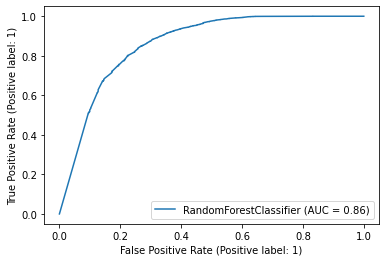

In [72]:
roc_curve_plot(rfc,x_test, y_test)

Confusion Matrix


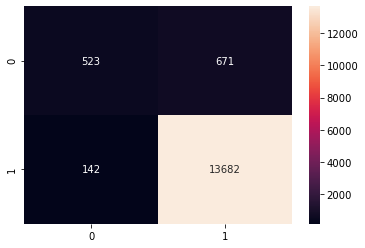

In [73]:
confusion_matrix_plot(rfc,x_test, y_test)

### Prediction

In [74]:
a_rfc = np.array(y_test)
predicted_rfc = np.array(rfc.predict(x_test))
df_rfc = pd.DataFrame({'Original':a_rfc,'Predicted':predicted_rfc})
df_rfc

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
15013,0,1
15014,1,1
15015,1,1
15016,1,1


In [75]:
sample(rfc,x_test,x_train)

the first 20 samples from dataset: 
[0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1]


In [76]:
pd.set_option('display.max_columns', None)
x_test

array([[-0.68014776,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943],
       [ 0.65424415,  0.15702045, -0.01694127, ..., -0.10491578,
        -1.13509032,  2.2839423 ],
       [ 0.34630756,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943],
       ...,
       [ 0.65424415,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943],
       [-0.88543882,  0.15702045, -0.01694127, ..., -0.10491578,
        -1.13509032, -0.43783943],
       [ 0.24366203,  0.15702045, -0.01694127, ..., -0.10491578,
         0.88098716, -0.43783943]])

## Hyperparameter Tuning

**- RandomizedSearchCV.**

In [92]:
n_estimators = [int(X) for X in np.linspace(start=100,stop=2000,num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(X) for X in np.linspace(5,100,15)]
min_samples_split = [2,5,10,20,50]
min_samples_leaf = [2,6,10,20,40]

In [93]:
rf_base = RandomForestClassifier()

In [94]:
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features}

In [ ]:
rf_tuned = RandomizedSearchCV(rf_base,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=2,verbose=2,random_state=10)
rf_tuned.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=2000; total time= 2.3min
[CV] END max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=20, n_estimators=2000; total time= 2.3min
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=733; total time= 1.0min
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=733; total time= 1.1min
[CV] END max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=50, n_estimators=944; total time= 1.1min
[CV] END max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=50, n_estimators=944; total time= 1.1min
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=311; total time=  28.7s
[CV] END max_depth=66, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_esti

In [ ]:
rf_tuned.best_params_

In [ ]:
rf_tun = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 2, max_features= 'auto',max_depth = 18)

In [ ]:
rf_tun.fit(x_train, y_train)
score(rf_tun, x_train, x_test, y_train, y_test, train = True)
score(rf_tun, x_train, x_test, y_train, y_test, train = False)

**- GridSearchCV.**

In [84]:
n_estimators_list = [130,160,190]
criterion_list = ['gini']
max_depth_list = [35,55]
min_samples_split_list = [0.001, 0.005]
min_samples_leaf_list = [0.001, 0.005]
max_features_list = ['log2']

In [85]:
params_grid = {'n_estimators': n_estimators_list,
               'criterion': criterion_list,
               'max_depth': max_depth_list,
               'min_samples_split': min_samples_split_list,
               'min_samples_leaf': min_samples_leaf_list,
               'max_features': max_features_list}

In [86]:
model_rfg = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),param_grid=params_grid,cv=3,verbose=4)
model_rfg.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=0.837 total time=  12.9s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=0.841 total time=   9.9s
[CV 3/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=130;, score=0.833 total time=  10.8s
[CV 1/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=0.838 total time=  13.0s
[CV 2/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, score=0.843 total time=  15.8s
[CV 3/3] END criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=160;, scor

[CV 1/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=190;, score=0.832 total time=  19.3s
[CV 2/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=190;, score=0.834 total time=  20.4s
[CV 3/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.001, min_samples_split=0.005, n_estimators=190;, score=0.826 total time=  16.7s
[CV 1/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.001, n_estimators=130;, score=0.809 total time=   9.5s
[CV 2/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.001, n_estimators=130;, score=0.808 total time=   9.1s
[CV 3/3] END criterion=gini, max_depth=55, max_features=log2, min_samples_leaf=0.005, min_samples_split=0.001, n_estimators=130;, score=0.798 total time=   9.9s
[CV 1/3] END criterion=gini, max_d

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [35, 55],
                         'max_features': ['log2'],
                         'min_samples_leaf': [0.001, 0.005],
                         'min_samples_split': [0.001, 0.005],
                         'n_estimators': [130, 160, 190]},
             verbose=4)

In [87]:
model_rfg.best_params_

{'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'log2',
 'min_samples_leaf': 0.001,
 'min_samples_split': 0.001,
 'n_estimators': 190}

In [88]:
model_rf_fin = RandomForestClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=55,
                                      max_features='log2',
                                      min_samples_leaf=0.001,
                                      min_samples_split=0.001,
                                      n_estimators=190)

In [89]:
model_rf_fin.fit(x_train, y_train)
score(model_rf_fin, x_train, x_test, y_train, y_test, train = True)
score(model_rf_fin, x_train, x_test, y_train, y_test, train = False)


 ----- Train Result ----- 

Accuracy Score: 0.832434352178642

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.30      0.81      0.44      3635
           1       0.98      0.83      0.90     41416

    accuracy                           0.83     45051
   macro avg       0.64      0.82      0.67     45051
weighted avg       0.93      0.83      0.86     45051


 ----- Confusion matrix ----- 
 [[ 2939   696]
 [ 6853 34563]]

 ----- Test Result ----- 

Accuracy Score: 0.8316686642695432

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.29      0.77      0.42      1194
           1       0.98      0.84      0.90     13824

    accuracy                           0.83     15018
   macro avg       0.63      0.80      0.66     15018
weighted avg       0.92      0.83      0.86     15018


 ----- Confusion matrix ----- 
 [[  921   273]
 [ 2255 11569]]


**- Post tuning results are low then the previous default parameter, so we will go with the default parameters only.**

## Pipeline

In [ ]:
pipeline_randomforest =  Pipeline([('scaler1', StandardScaler()),
                               ('pca1',PCA(n_components=2)),
                               ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipeline_randomforest.fit(x_train,y_train)
pred = pipeline_randomforest.predict(x_test)
accuracy_score(y_test,pred) 

## KNeighbors

In [1]:
knn = KNeighborsClassifier()

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,y,random_state = 10,test_size=0.35)

In [ ]:
acc_score =[]
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    score = cross_val_score(knn,X_train,Y_train,cv=2)
    acc_score.append(score.mean())

In [ ]:
plt.figure()
plt.plot(range(1,30),acc_score,color='blue',marker='o',markerfacecolor='red')
plt.xlabel('Values for K')
plt.ylabel('Accuracy Score Value')
plt.title('Accuracy Score v/s K-Value')
plt.show()

In [ ]:
error_score = []
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    score = cross_val_score(knn,X_train,Y_train,cv=2)
    error_score.append(1-(score.mean()))

In [ ]:
plt.figure()
plt.plot(range(1,30),error_score,color='blue',marker='o',markerfacecolor='red')
plt.xlabel('Values for K')
plt.ylabel('Error Score Value')
plt.title('Error Score v/s K-Value')
plt.show()

**From both the error curve and accuracy curve we can see that the value of error as well as accuracy becomes nearly constant for values of K equal to 7 or 8.**

## KNN MODEL - K=8

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=8)
knn_1.fit(X_train,Y_train)

In [ ]:
predict_1 = knn_1.predict(X_test)

In [ ]:
print(accuracy_score(predict_1,Y_test))

In [ ]:
print(confusion_matrix(predict_1,Y_test))

In [ ]:
print(classification_report(Y_test,predict_1))

## KNN MODEL - K=7

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=7)
knn_2.fit(X_train,Y_train)

In [ ]:
predict_2 = knn_2.predict(X_test)
print(accuracy_score(predict_2,Y_test))

In [ ]:
print(confusion_matrix(predict_2,Y_test))

In [ ]:
print(classification_report(Y_test,predict_2))

## Hyperparameter Tuning

In [ ]:
grid_params = { 'n_neighbors' : [7,8,9,11,13,15,17],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=2, n_jobs = -1)
g_res = gs.fit(X_train, Y_train)
g_res.best_score_

In [ ]:
g_res.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',metric = 'manhattan')

In [ ]:
knn.fit(X_train, Y_train)
score(knn, X_train, X_test, Y_train, Y_test, train = True)
score(knn, X_train, X_test, Y_train, Y_test, train = False)

**As we can conclude that, post tuning score is very close to the previous accuracy score, so we can consider that our model is giving best accuracy score in both of the cases before and after tuning.**

## Pipeline:

In [ ]:
pipeline_KNeighborsClassifier= Pipeline([('scaler2', StandardScaler()),
                                        ('pca2',PCA(n_components=2)),
                                        ('kNN_classifier',KNeighborsClassifier(n_neighbors = 7))])

In [ ]:
pipeline_KNeighborsClassifier.fit(x_train,y_train)
pred = pipeline_KNeighborsClassifier.predict(x_test)
accuracy_score(y_test,pred)

## QDA Model.

**- Model Training.**

In [ ]:
qda = QuadraticDiscriminantAnalysis()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = 6, test_size = 0.25)

In [ ]:
qda.fit(x_train,y_train)
score(qda, x_train, x_test, y_train, y_test, train = True)
score(qda, x_train, x_test, y_train, y_test, train = False)

In [ ]:
roc_curve_plot(qda,x_test, y_test)

In [ ]:
confusion_matrix_plot(qda,x_test, y_test)

In [ ]:
a_qda = np.array(y_test)
predicted_qda = np.array(qda.predict(x_test))
df_qda = pd.DataFrame({'Original':a_qda,'Predicted':predicted_qda})
df_qda

### Hyperparameter Tuning

In [ ]:
qda.get_params()

In [ ]:
parameters = {'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1,0.5), 
              'store_covariance': (True, False),
              'tol': (0.0001, 0.001,0.01, 0.1)} 

In [ ]:
g_qda = GridSearchCV(estimator=qda, param_grid=parameters, cv = 2)
g_res = g_qda.fit(x_train, y_train)
print(g_res.best_params_)

In [ ]:
qda = QuadraticDiscriminantAnalysis(reg_param = 1e-05, store_covariance= True, tol= 0.0001)

In [ ]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = i, test_size = 0.25)
    qda.fit(x_train,y_train)
    pred_train = qda.predict(x_train)
    pred_test = qda.predict(x_test) 
    if  round(accuracy_score(y_test,pred_test)*100,1) >= 94:
        print('At Random state:',i)
        print('Training score :',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing score:',round(accuracy_score(y_test,pred_test)*100,1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state = 3, test_size = 0.25)

In [ ]:
qda.fit(x_train,y_train)
score(qda, x_train, x_test, y_train, y_test, train = True)
score(qda, x_train, x_test, y_train, y_test, train = False)

**As we can conclude that, post tuning score is very close to the previous accuracy score, so we can consider that our model is giving best accuracy score in both of the cases before and after tuning, So can go with both of the parameters.**